In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import ndimage
import matplotlib.pyplot as plt
import random

# Airplane Crashes and Fatalities upto 2023

## 1. Data Import and Cleaning:

- Import the dataset using Pandas.
- Clean and preprocess the data, addressing missing values and categorizing data as needed.
- Convert dates and other relevant fields to appropriate formats.

In [41]:
airplane_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding = 'latin')

In [3]:
# first 5 rows

airplane_df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:
# type of the data

airplane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [5]:
# fill in missing data 30% - 75%

airplane_df['Time'] = airplane_df['Time'].fillna('Unknown')
airplane_df['Flight #'] = airplane_df['Flight #'].fillna('Unknown')

In [6]:
# fill in missing data < 20%
airplane_df['Operator'] = airplane_df['Operator'].fillna('Unknown Operator')
airplane_df['Location'] = airplane_df['Location'].fillna('Unknown City, Unknown Country')
airplane_df['Route'] = airplane_df['Route'].fillna('Unknown')
airplane_df['AC Type'] = airplane_df['AC Type'].fillna('Unknown')
airplane_df['Registration'] = airplane_df['Registration'].fillna('Unknown')
airplane_df['cn/ln'] = airplane_df['cn/ln'].fillna('Unknown')

In [7]:
# find missinf values

airplane_df.isna().sum()

Date                       0
Time                       0
Location                   0
Operator                   0
Flight #                   0
Route                      0
AC Type                    0
Registration               0
cn/ln                      0
Aboard                    18
Aboard Passangers        229
Aboard Crew              226
Fatalities                 8
Fatalities Passangers    242
Fatalities Crew          241
Ground                    42
Summary                   64
dtype: int64

In [8]:
# convert date to date format
airplane_df['Date'] = pd.to_datetime(airplane_df['Date'], errors='coerce')

In [9]:
# convert time to time format
airplane_df['Time'] = pd.to_datetime(airplane_df['Time'], format='%H:%M', errors='coerce').dt.time

## 2. Exploratory Data Analysis:

- Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
- Analyze the frequency of crashes over time to identify any trends.

In [10]:
# number of crashes
sum_crashes = airplane_df['Date'].count()

# number of fatalities
sum_fatalities = airplane_df['Fatalities'].sum()

# number of survival rates
sum_survival = airplane_df['Aboard'].sum() - sum_fatalities

print(f'''Number of Crashes : {sum_crashes}
Total Number of Passangers with Crew : {airplane_df['Aboard'].sum()}
Number of Fatalities : {sum_fatalities}
Number of Survival Rates : {sum_survival}''')

Number of Crashes : 4998
Total Number of Passangers with Crew : 155356.0
Number of Fatalities : 111644.0
Number of Survival Rates : 43712.0


In [11]:
# make column with year to count the frequency of crashes
airplane_df['Year'] = airplane_df['Date'].dt.year

In [12]:
crashes_per_year = airplane_df.groupby('Year').size()

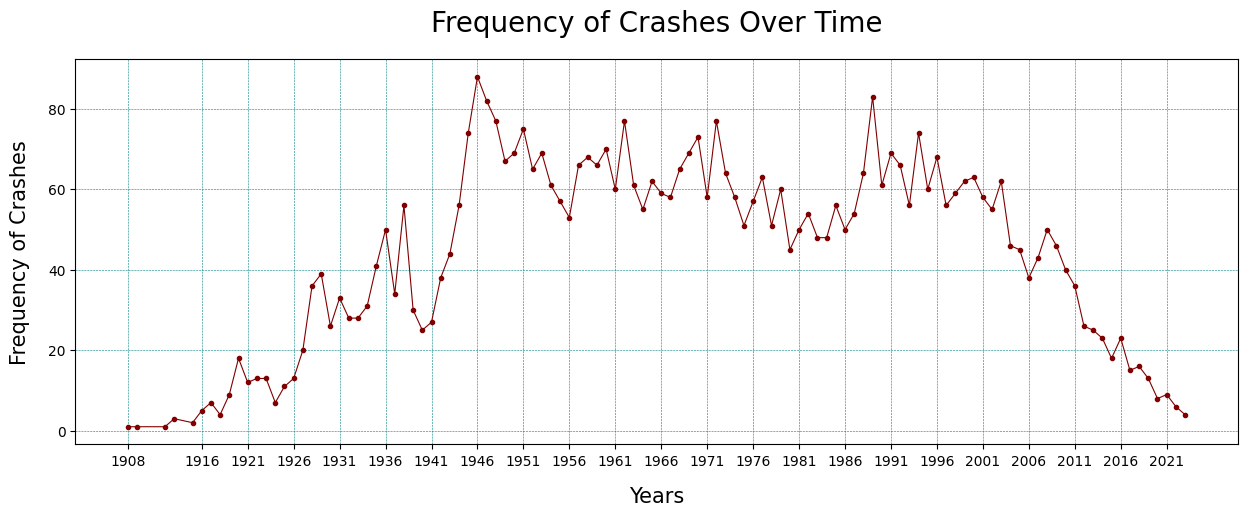

In [13]:
plt.figure(figsize = (15, 5))
plt.plot(crashes_per_year.index, crashes_per_year.values, linewidth = 0.8, color = 'maroon', marker = 'o', markersize = 3)
plt.grid(linewidth = 0.4, linestyle = '--', color = 'teal')
plt.title('Frequency of Crashes Over Time', fontsize = 20, pad = 20)
plt.xlabel('Years', fontsize = 15, labelpad = 13)
plt.ylabel('Frequency of Crashes', fontsize = 15, labelpad = 13)

plt.xticks(crashes_per_year.index[::5])


plt.show()

**Conclusions**:
- After World War II, there was a surge in airplane crashes. In 1946, more than 80 crashes occurred.
- In 1988, there was also a significant increase in crashes, similar to the post-war frequency.
- However, after that, possibly due to advancements in aviation technology, the number of airplane crashes gradually decreased. By 2023, only 4 crashes were recorded.

## 3. Statistical Analysis:

- Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
- Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

In [14]:
# make describe variable for fatalities to count mean, median and std
describe_fatal = scipy.stats.describe(airplane_df['Fatalities'].dropna().values)

# mean
mean_fatal = describe_fatal.mean

# median
median_fatal = np.median(airplane_df['Fatalities'].dropna())

# standard deviation
std_fatal = np.std(airplane_df['Fatalities'].dropna())

print(f'''Average Number of Fatalities : {mean_fatal:2f}
Median of Fatalities : {median_fatal}
Standard Deviation of Fatalities : {std_fatal:2f}''')

Average Number of Fatalities : 22.373547
Median of Fatalities : 11.0
Standard Deviation of Fatalities : 35.058227


In [15]:
# count number of survivals for each flight
airplane_df['Survivals'] = airplane_df['Aboard'] - airplane_df['Fatalities']

# make describe variable for survivals to count mean, median and std
describe_sirv = scipy.stats.describe(airplane_df['Survivals'].dropna().values)

# mean
mean_sirv = describe_sirv.mean

# median
median_sirv = np.median(airplane_df['Survivals'].dropna())

# standard deviation
std_sirv = np.std(airplane_df['Survivals'].dropna())

print(f'''Average Number of Survivals : {mean_sirv:2f}
Median of Survivals : {median_sirv}
Standard Deviation of Survivals : {std_sirv:2f}''')

Average Number of Survivals : 8.794177
Median of Survivals : 0.0
Standard Deviation of Survivals : 30.649423


In [53]:
# for histogram will take top-10 locations

top10_loc_fatal = airplane_df[['Location', 'Fatalities']].dropna().groupby('Location')['Fatalities'].mean().sort_values(ascending=False)
top10_mean = top10_loc_fatal.head(10)
top10_mean

Location
Mt. Osutaka, near Ueno Village, Japan             520.0
Near Charkhi Dadri, India                         349.0
Near Ermenonville, France                         346.0
Atlantic Ocean, 110 miles West of Ireland         329.0
Riyadh, Saudi Arabia                              301.0
Hrabove, Ukraine                                  298.0
Over the Persian Gulf, near Bandar Abbas, Iran    290.0
Near Shahdad, Iran                                275.0
Chicago O'Hare, Illinois                          271.0
Near Sakhalin Island, Russia                      269.0
Name: Fatalities, dtype: float64

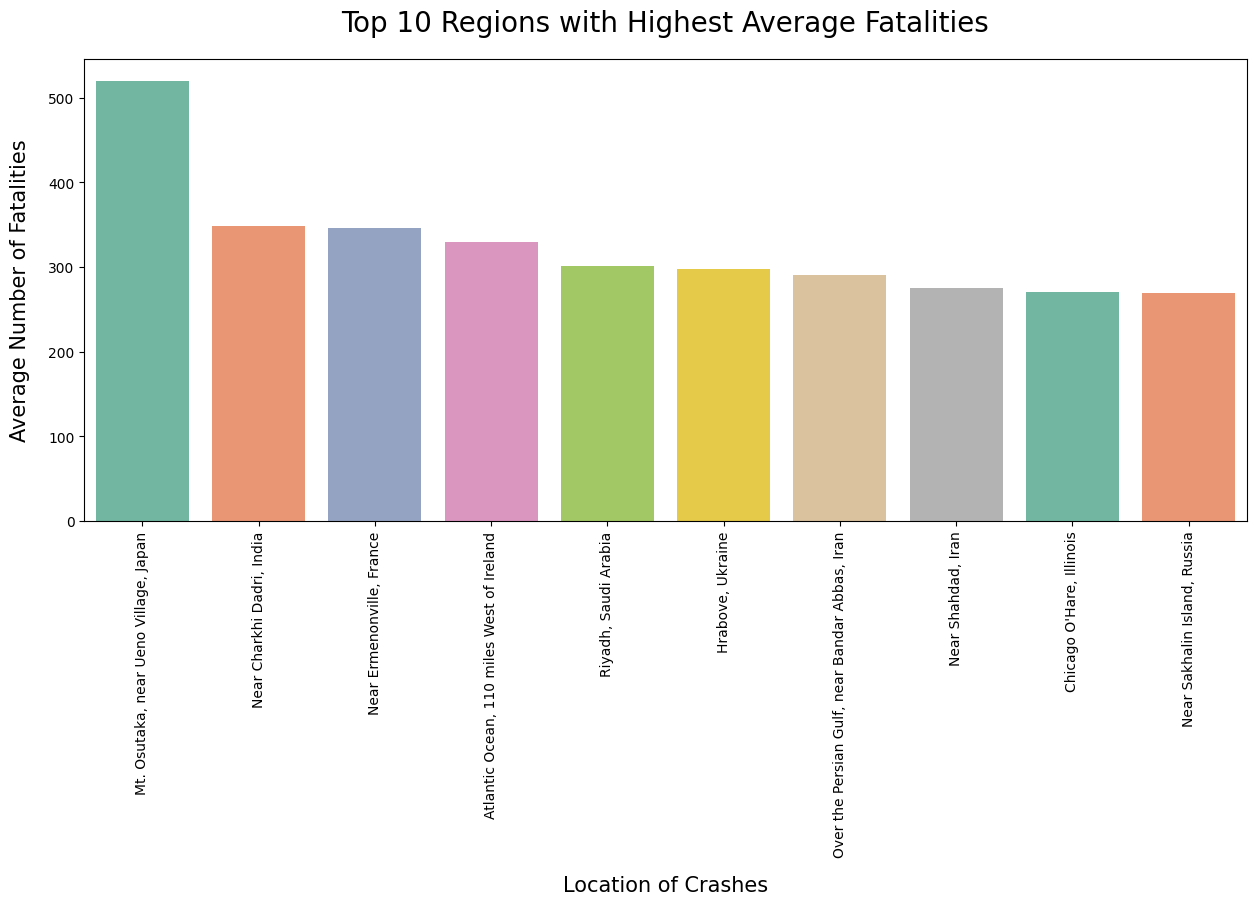

In [71]:
# build a barplot for average number of fatalities in top-10 regions

plt.figure(figsize = (15, 6))
sns.barplot(x = top10_mean.index, y = top10_mean.values, hue = top10_mean.index, palette = 'Set2')
plt.title("Top 10 Regions with Highest Average Fatalities", fontsize = 20, pad = 20)
plt.xlabel("Location of Crashes", fontsize = 15, labelpad = 13)
plt.ylabel("Average Number of Fatalities", fontsize = 15, labelpad = 13)

plt.xticks(rotation = 90)

plt.show()

**Conclusions**:
- On the bar plot, we see that the airplane crashes with the highest average number of fatalities occur in Japan near Ueno Village.
- Other locations have almost similar average numbers of fatalities, around 300–350.